## Medical Insurance Cost Prediction Using Linear Regression

In [1]:
##Importing all libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [3]:
## Reading the dataset
insurance_dataset = pd.read_csv("insurance.csv")

In [4]:
# Checking the first 5 rows of the dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Checking the last 5 rows of the dataset
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#Checking the structure of the dataset

insurance_dataset.shape

(1338, 7)

In [7]:
# Checking if the dataset have null values

insurance_dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset

In [8]:
## Getting some information on the dataset

insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Data Analysis

In [9]:
## Checking the statistical measures to the dataset

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Find the distribution of the dataset

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


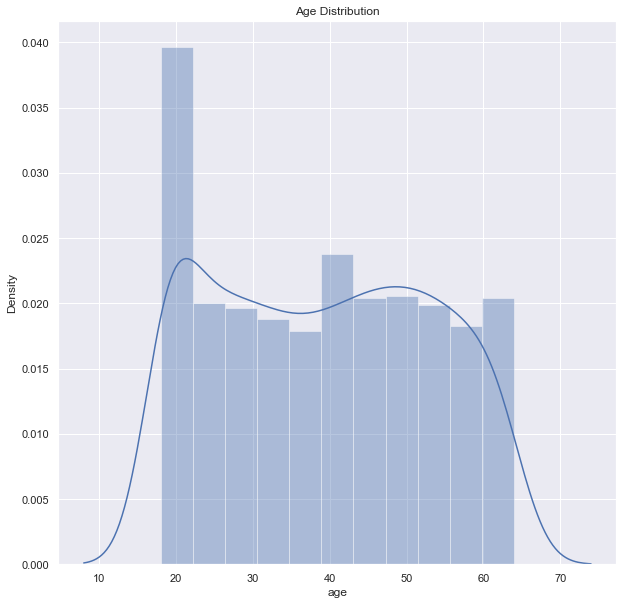

In [10]:
## Distribution of age

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(insurance_dataset["age"])
plt.title("Age Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


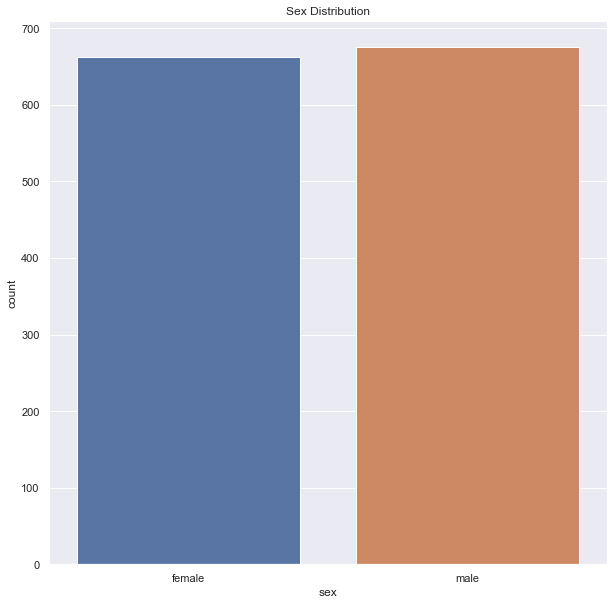

In [11]:
## Distribution of sex

plt.figure(figsize=(10,10))
sns.countplot(insurance_dataset["sex"])
plt.title("Sex Distribution")
plt.show()

In [12]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


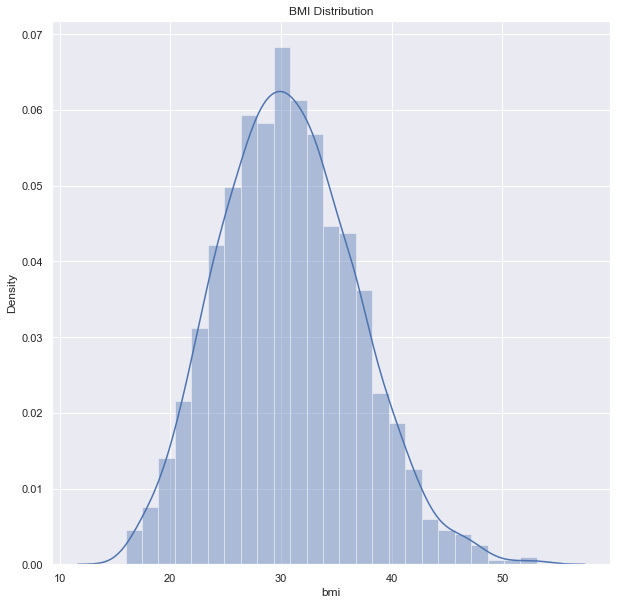

In [13]:
## Distribution of bmi

plt.figure(figsize=(10,10))
sns.distplot(insurance_dataset["bmi"])
plt.title("BMI Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


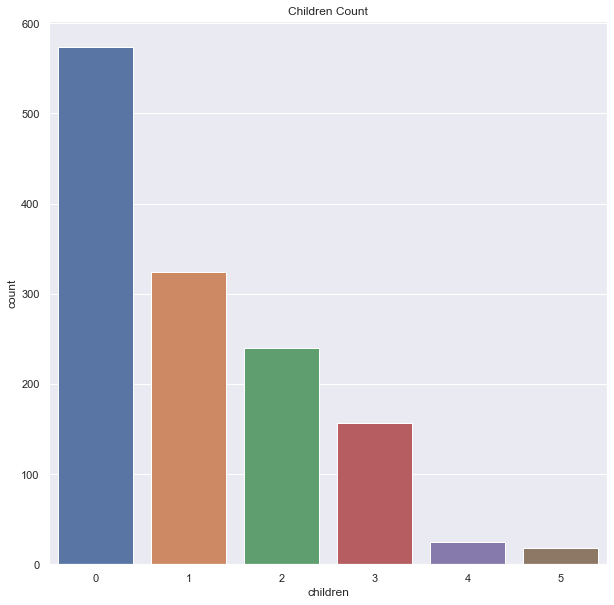

In [14]:
## Distribution of Children

plt.figure(figsize=(10,10))
sns.countplot(insurance_dataset["children"])
plt.title("Children Count")
plt.show()

In [15]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


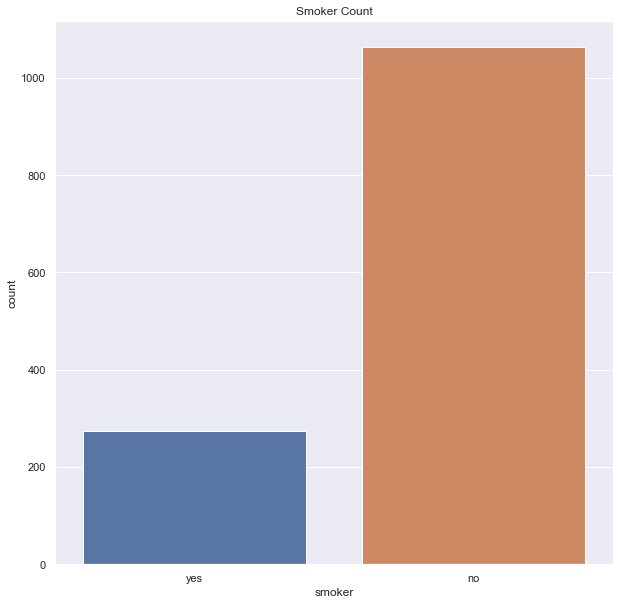

In [16]:
## Distribution of Smoker

plt.figure(figsize=(10,10))
sns.countplot(insurance_dataset["smoker"])
plt.title("Smoker Count")
plt.show()

In [17]:
insurance_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


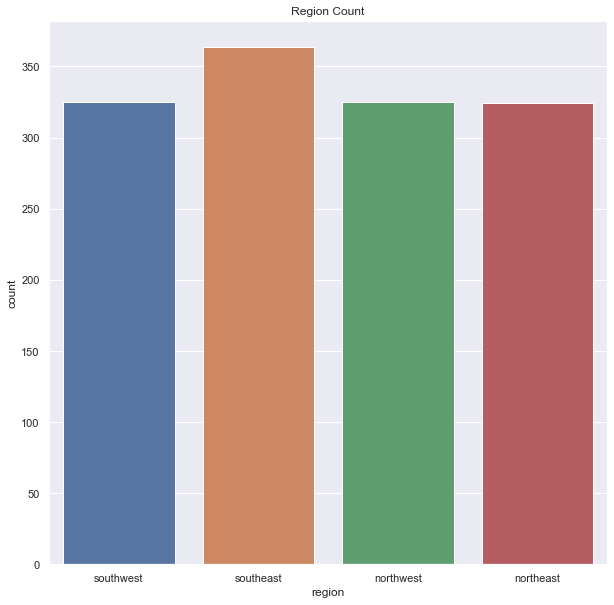

In [18]:
## Distribution of Region

plt.figure(figsize=(10,10))
sns.countplot(insurance_dataset["region"])
plt.title("Region Count")
plt.show()

In [19]:
insurance_dataset["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


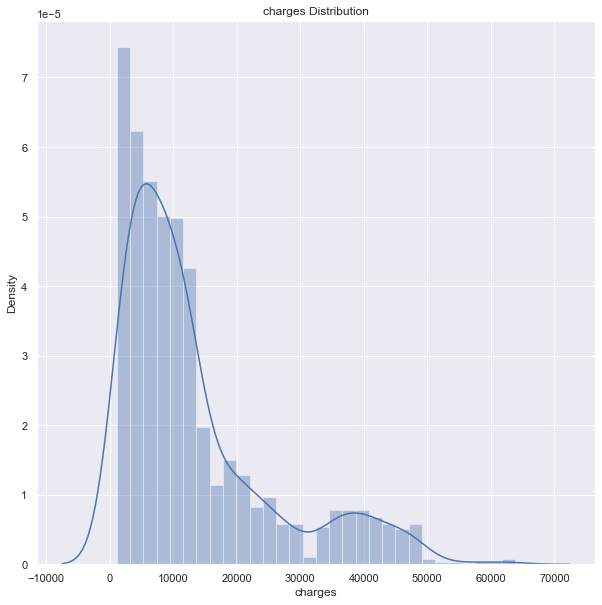

In [20]:
## Distribution of Charges

plt.figure(figsize=(10,10))
sns.distplot(insurance_dataset["charges"])
plt.title("charges Distribution")
plt.show()

##### Data Pre-Processing

##### Encode the categorical features

In [21]:
categorical_features=[feature for feature in insurance_dataset.columns if insurance_dataset[feature].dtypes=='O']
categorical_features

['sex', 'smoker', 'region']

In [22]:
## Encoding Sex Column

insurance_dataset.replace({"sex":{"male":0, "female":1}}, inplace=True)

In [23]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [24]:
## Encoding smoker Column

insurance_dataset.replace({"smoker":{"yes":0, "no":1}}, inplace=True)

In [25]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [26]:
## Encoding region Column

insurance_dataset["region"].replace({"southwest":0,"southeast":1,"northeast":2,"northwest":3}, inplace=True)

In [27]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [28]:
## Splitting the features and Target

X=insurance_dataset.drop("charges", axis=1)
y=insurance_dataset["charges"]

In [29]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,1
1336,21,1,25.800,0,1,0


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
## Performing the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [33]:
##Model Training

model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Model Evaluation

In [36]:
## Prediction on testing data

y_pred_test = model.predict(X_test)

In [37]:
pd.DataFrame({"Actual Values":y_test, "Predicted Values":y_pred_test})

,Actual Values,Predicted Values
17,2395.17155,1545.924676
1091,11286.53870,11587.485980
273,9617.66245,10107.810585
270,1719.43630,2437.001507
874,8891.13950,7927.070251
...,...,...
232,1727.78500,-1910.902142
323,11566.30055,15710.380304
1337,29141.36030,37008.253528
1066,8978.18510,13167.527229


In [40]:
# Prediction on training data

y_pred_train = model.predict(X_train)

In [39]:
pd.DataFrame({"Actual Values":y_train, "Predicted Values":y_pred_train})

,Actual Values,Predicted Values
882,2585.85065,508.034947
505,6796.86325,9372.893780
798,11848.14100,12921.262626
792,2731.91220,1102.441363
201,8871.15170,10950.251864
...,...,...
466,13224.69300,12565.025144
299,9249.49520,10345.118203
493,12574.04900,17028.450815
527,9861.02500,9349.121236


In [41]:
model.coef_

array([   251.62812837,     26.27645329,    328.01750072,    583.78326435,
       -23913.42959523,    246.86248321])

In [42]:
model.intercept_

11356.605048033545

In [47]:
## R squared Value

r2_train = metrics.r2_score(y_train,y_pred_train)
r2_train

0.7516346664929344

In [48]:
r2_test = metrics.r2_score(y_test,y_pred_test)
r2_test

0.7441032539760071

In [55]:
model.score(X_train,y_train)

0.7516346664929344

In [56]:
model.score(X_test,y_test)

0.7441032539760071

In [58]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [59]:
adj_r2(X_train,y_train)

0.7502327925502793

In [60]:
adj_r2(X_test,y_test)

0.7382205701593636

In [61]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [62]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.061943839838449

In [63]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=2.061943839838449, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
lasso_reg.score(X_test, y_test)

0.7441074598123977

In [65]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([7.27045885, 1.86129806, 4.41228629, 0.38725435, 8.21105814,
       3.36218626, 8.23283562, 4.44518895, 6.0737057 , 5.42454855,
       7.82411443, 6.98006181, 5.96149791, 6.67147344, 4.21301816,
       7.22895181, 1.31350645, 3.05595079, 8.14940261, 4.41591689,
       8.07069299, 1.082135  , 6.19991187, 3.64146846, 9.38219959,
       4.81530987, 8.90298957, 5.75327128, 5.87152542, 4.80241903,
       9.34713652, 5.83692194, 7.03419125, 0.41634356, 9.29328893,
       6.65564126, 4.8258707 , 6.36255548, 7.95187984, 5.68728193,
       3.70596381, 2.7126932 , 9.48714129, 4.64277976, 9.28992489,
       9.52121464, 3.38752068, 6.36220038, 5.54927634, 6.48405129]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [66]:
ridgecv.alpha_

0.3872543497458769

In [67]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.3872543497458769, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
ridge_model.score(X_test, y_test)

0.7441471151595627

In [69]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [70]:
elasticCV.alpha_

95.90573484820037

In [71]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [72]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=95.90573484820037, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [73]:
elasticnet_reg.score(X_test, y_test)

0.13249792442002706